![](OIP.jpeg)

The BJP-led NDA surpassed the majority threshold of 272 and won 293 seats. However, unlike the previous election, the BJP did not win a majority in both houses of parliament having only won 240 seats (losing 63 seats from the 303 seats they previously held since 2019 as well as losing their 10-year long benefit of being the sole-controller of both houses of parliament since 2014) in the Lok Sabha.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"election_results_2024.csv")

In [3]:
df.head()

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared


In [4]:
df.shape

(543, 8)

In [5]:
df.columns

Index(['Constituency', 'Const. No.', 'Leading Candidate', 'Leading Party',
       'Trailing Candidate', 'Trailing Party', 'Margin', 'Status'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Constituency        543 non-null    object
 1   Const. No.          543 non-null    int64 
 2   Leading Candidate   543 non-null    object
 3   Leading Party       543 non-null    object
 4   Trailing Candidate  542 non-null    object
 5   Trailing Party      542 non-null    object
 6   Margin              543 non-null    object
 7   Status              543 non-null    object
dtypes: int64(1), object(7)
memory usage: 34.1+ KB


In [7]:
df.describe()

,Const. No.
count,543.000000
mean,18.178637
std,16.427840
min,1.000000
25%,6.000000
50%,14.000000
75%,25.000000
max,80.000000


In [8]:
df.isnull().sum()

Constituency          0
Const. No.            0
Leading Candidate     0
Leading Party         0
Trailing Candidate    1
Trailing Party        1
Margin                0
Status                0
dtype: int64

In [9]:
df['Trailing Candidate'].fillna(df['Trailing Candidate'].mode(),inplace=True)

In [10]:
df['Trailing Party'].fillna(df['Trailing Party'].mode()[0],inplace=True)


In [11]:
df.isnull().sum()

Constituency          0
Const. No.            0
Leading Candidate     0
Leading Party         0
Trailing Candidate    0
Trailing Party        0
Margin                0
Status                0
dtype: int64

In [14]:
df.isnull().sum()

Constituency          0
Const. No.            0
Leading Candidate     0
Leading Party         0
Trailing Candidate    0
Trailing Party        0
Margin                0
Status                0
dtype: int64

# Party with highest lowest margin of victory

In [15]:
party_votes = df.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)

In [16]:
df['Margin'] =pd.to_numeric(df['Margin'],errors='coerce')

In [17]:
highest_margin = df.loc[df['Margin'].idxmax()]
lowest_margin = df.loc[df['Margin'].idxmin()]

# No. of seats won by the Each party

In [18]:
leading_party_highest_votes = party_votes.idxmax()
leading_party_lowest_votes = party_votes.idxmin()

In [19]:
seats_won = df['Leading Party'].value_counts()

<function matplotlib.pyplot.show(close=None, block=None)>

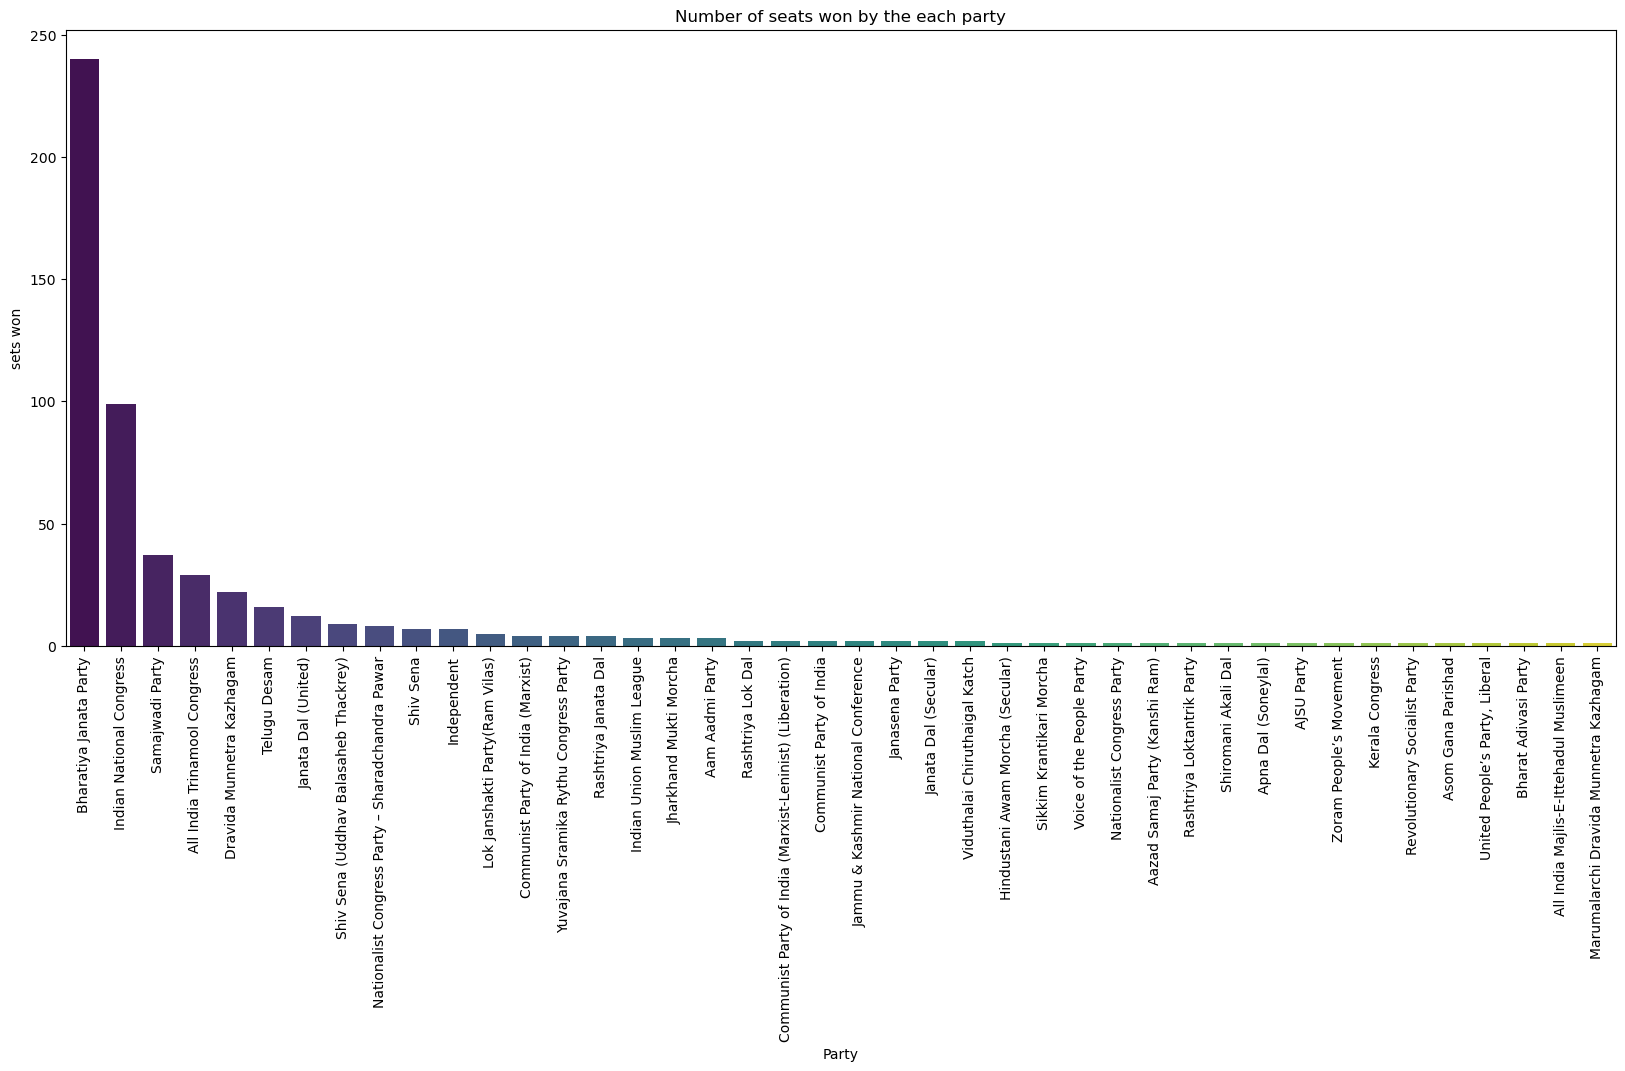

In [20]:
plt.figure(figsize=(20,8))
sns.barplot(x=seats_won.index, y=seats_won.values, palette='viridis')
plt.title('Number of seats won by the each party')
plt.xlabel('Party')
plt.ylabel('sets won')
plt.xticks(rotation=90)
plt.show

# Get votes for Rahul gandhi,Narendra Modi and Amit shah

In [31]:
rahul_entries = df[df['Leading Candidate'] == 'RAHUL GANDHI']
modi_entries = df[df['Leading Candidate'] == 'NARENDRA MODI']
amit_entries = df[df['Leading Candidate'] =='AMIT SHAH']

#Get votes for Rahul gandhi,Narendra Modi and Amit shah
rahul_votes = rahul_entries['Margin'].values
modi_votes = modi_entries['Margin']. values[0] if not modi_entries. empty else 0
amit_votes = amit_entries['Margin'].values[0] if not amit_entries. empty else 0


In [32]:
# Check column names
print(rahul_entries.columns)
print(modi_entries.columns)
print(amit_entries.columns)


Index(['Constituency', 'Const. No.', 'Leading Candidate', 'Leading Party',
       'Trailing Candidate', 'Trailing Party', 'Margin', 'Status'],
      dtype='object')
Index(['Constituency', 'Const. No.', 'Leading Candidate', 'Leading Party',
       'Trailing Candidate', 'Trailing Party', 'Margin', 'Status'],
      dtype='object')
Index(['Constituency', 'Const. No.', 'Leading Candidate', 'Leading Party',
       'Trailing Candidate', 'Trailing Party', 'Margin', 'Status'],
      dtype='object')


In [33]:
#Get the original constituency name for Rahul Gandhi
rahul_constituencies = list (rahul_entries['Constituency'])

#Get the original constituency name for Narendra Modi
modi_constituency = modi_entries['Constituency'].values[0] if not modi_entries.empty else "Mo"

#get the original constituency name for Amit shah
amit_constituency = amit_entries['Constituency'].values[0] if not amit_entries.empty else "Am"


In [34]:
# Combine the data
data_to_plot = pd.DataFrame({
    'Candidate': ['Rahul Gandhi'] * len(rahul_votes) + ['Narendra Modi', 'Amit Shah'],
    'Constituency':rahul_constituencies + [modi_constituency, amit_constituency],
    'Votes': list(rahul_votes) + [modi_votes, amit_votes]
})

In [26]:
df.head()

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991.0,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282.0,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036.0,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794.0,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559.0,Result Declared


In [29]:
df[df['Leading Candidate'] == 'NARENDRA MODI']

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
533,Varanasi,77,NARENDRA MODI,Bharatiya Janata Party,AJAY RAI,Indian National Congress,152513.0,Result Declared


In [30]:
df[df['Leading Candidate'] == 'RAHUL GANDHI']

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
430,Rae Bareli,36,RAHUL GANDHI,Indian National Congress,DINESH PRATAP SINGH,Bharatiya Janata Party,390030.0,Result Declared
539,Wayanad,4,RAHUL GANDHI,Indian National Congress,ANNIE RAJA,Communist Party of India,364422.0,Result Declared


In [35]:
data_to_plot

,Candidate,Constituency,Votes
0,Rahul Gandhi,Rae Bareli,390030.0
1,Rahul Gandhi,Wayanad,364422.0
2,Narendra Modi,Varanasi,152513.0
3,Amit Shah,Gandhinagar,744716.0


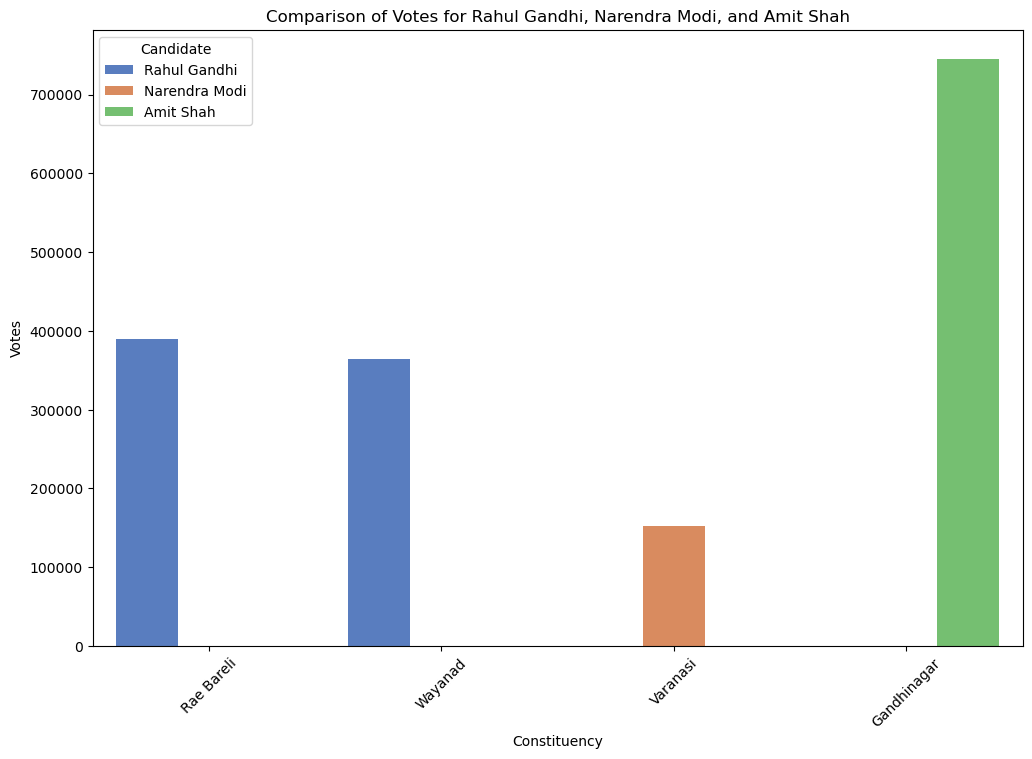

In [36]:
# Plot the comparison
plt.figure(figsize=(12, 8))
sns.barplot(data=data_to_plot, x='Constituency', y='Votes', hue='Candidate', palette='muted')
plt.title('Comparison of Votes for Rahul Gandhi, Narendra Modi, and Amit Shah')
plt.xlabel('Constituency')
plt.ylabel('Votes')
plt.xticks(rotation=45)
plt.show()
 